In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


**I HAVE WRITTEN MY CODE IN THE EASIEST WAY THAT WAS POSSIBLE FOR ME.**


In [2]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv')

In [4]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [7]:
df.drop(['id','name','sentry_object','orbiting_body'],axis=1,inplace=True) #removing usless columns

In [8]:
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


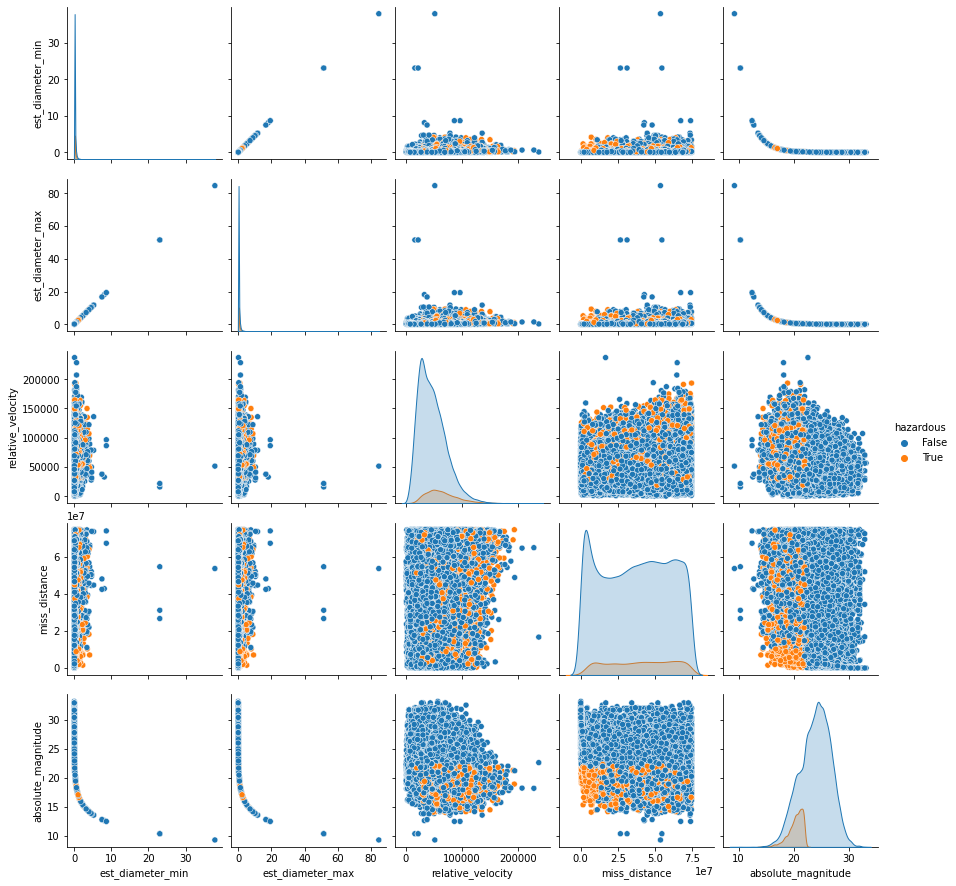

In [9]:
sns.pairplot(df,hue='hazardous')

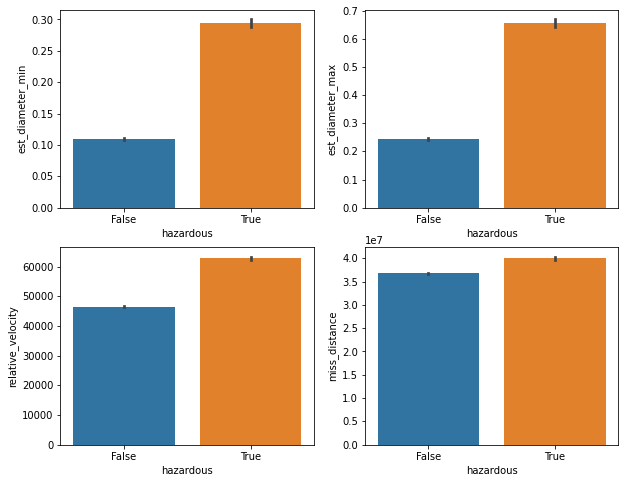

In [10]:
cols = ['est_diameter_min', 'est_diameter_max', 'relative_velocity','miss_distance']
plt.figure(figsize=(10,8))
c=1
for i in cols:
    plt.subplot(2,2,c)
    sns.barplot(data=df,x='hazardous',y=i)
    c+=1

**Plotted Hazardous w.r.t Other Criterions.**

<AxesSubplot:>

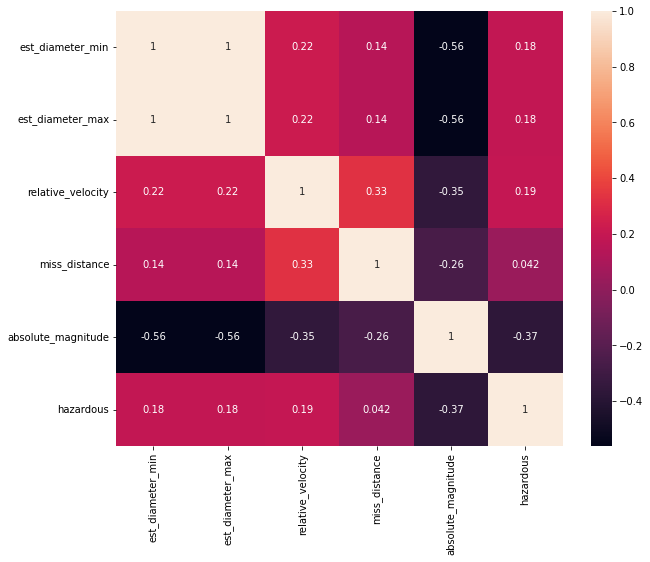

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Here we can see that Max Diameter and Min Diameter are competely co-related. Hence, we can drop either of them.

In [12]:
df.drop('est_diameter_max',axis=1,inplace=True)


<AxesSubplot:>

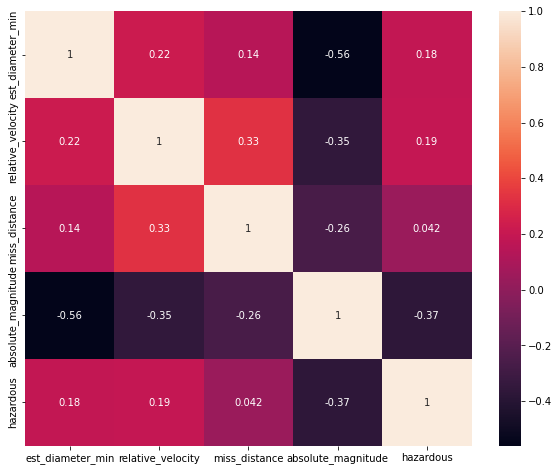

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

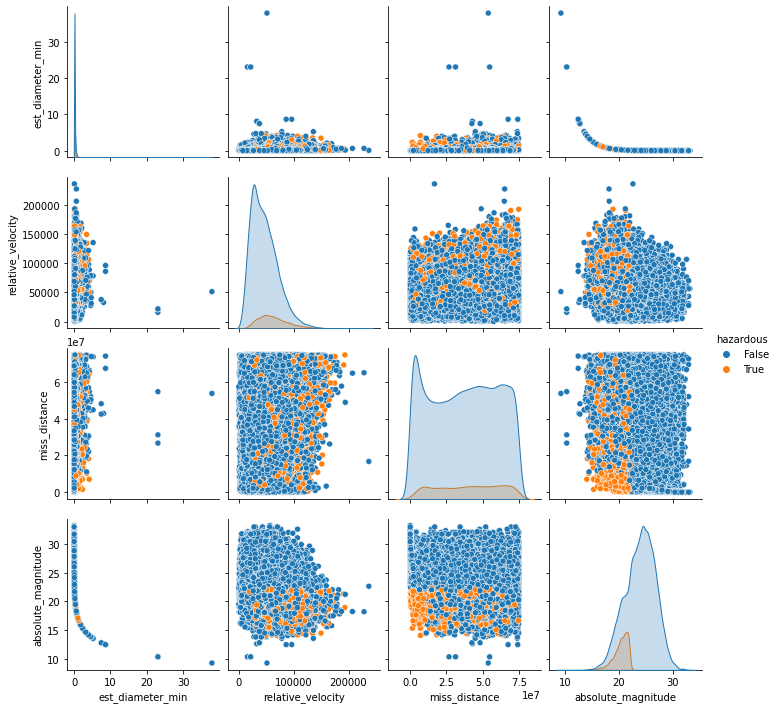

In [14]:
sns.pairplot(df, hue = 'hazardous')

In [15]:
#Data After Cleaning
df.head()

,est_diameter_min,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,13569.249224,5.483974e+07,16.73,False
1,0.265800,73588.726663,6.143813e+07,20.00,True
2,0.722030,114258.692129,4.979872e+07,17.83,False
3,0.096506,24764.303138,2.543497e+07,22.20,False
4,0.255009,42737.733765,4.627557e+07,20.09,True


In [16]:
df.columns

Index(['est_diameter_min', 'relative_velocity', 'miss_distance',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [17]:
# Splitting the data
from sklearn.model_selection import train_test_split
X = df.drop(columns='hazardous')
Y=df.loc[:,'hazardous']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,train_size=0.75)

In [18]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() # Machine Instance
train_scaled=pd.DataFrame(sc.fit_transform(X_train)) # Scaling the train set
test_scaled=pd.DataFrame(sc.transform(X_test))

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.
#In graph form, normal distribution will appear as a bell curve.
gnb = GaussianNB()
gnb.fit(train_scaled,Y_train)
prediction = gnb.predict(test_scaled)
print(accuracy_score(Y_test,prediction)*100)

86.19049715971641


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(train_scaled,Y_train)
prediction = lr.predict(test_scaled)
print(accuracy_score(Y_test,prediction)*100)

90.2461579109604


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(train_scaled,Y_train)
prediction =knn.predict(test_scaled)
print(accuracy_score(Y_test,prediction)*100)

90.11845523801136


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(train_scaled,Y_train)
prediction = rf.predict(test_scaled)
print(accuracy_score(Y_test,prediction)*100)

91.87987141661897


In [23]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(train_scaled,Y_train)


# make predictions on test set
y_pred=svc.predict(test_scaled)


# compute and print accuracy score
print(accuracy_score(Y_test, y_pred)*100)

91.08723413624554


In [24]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(train_scaled,Y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(test_scaled)


# compute and print accuracy score
print(accuracy_score(Y_test, y_pred_test)*100)

90.1977189660487
